In [1]:
import matplotlib.pyplot as plt
from benchmark_dataset import benchmark

In [2]:
### Parameters

dataset_name = "mnist"
num_classes = 3
num_data_per_class = 1
model_path = "fine_tuning/pretrained_models/bisonai/1shot_3way_bisonai_ckpt_o15t/model.ckpt-99999"
epochs = 5
lr_range = [0.01, 0.005, 0.001]
num_data_train = 10
num_data_test = 10

In [3]:
acc, avg_loss_train, avg_loss_test = benchmark(num_classes,
                num_data_per_class,
                model_path,
                dataset_name,
                epochs,
                lr_range,
                num_data_train,
                num_data_test)

print(acc)

100%|██████████| 3/3 [00:11<00:00,  3.82s/it]

[0.75, 0.76, 0.76]


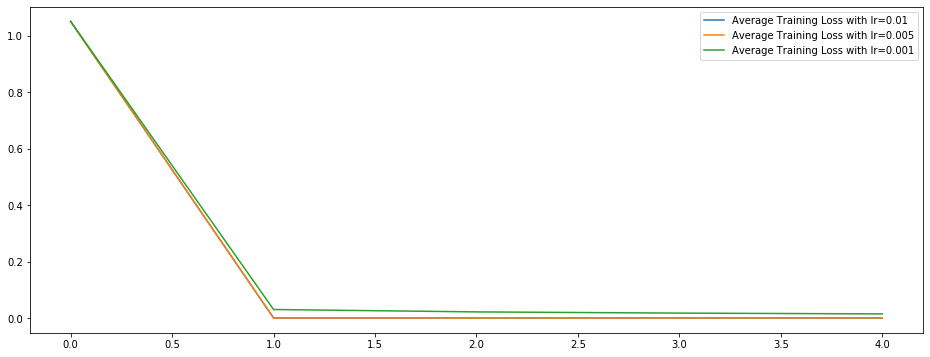

In [4]:
fig = plt.figure(figsize=(16, 6))

for i in range(len(lr_range)):
    plt.plot(range(epochs), avg_loss_train[i], label = "Average Training Loss with lr={}".format(lr_range[i]))

plt.legend()
plt.show()

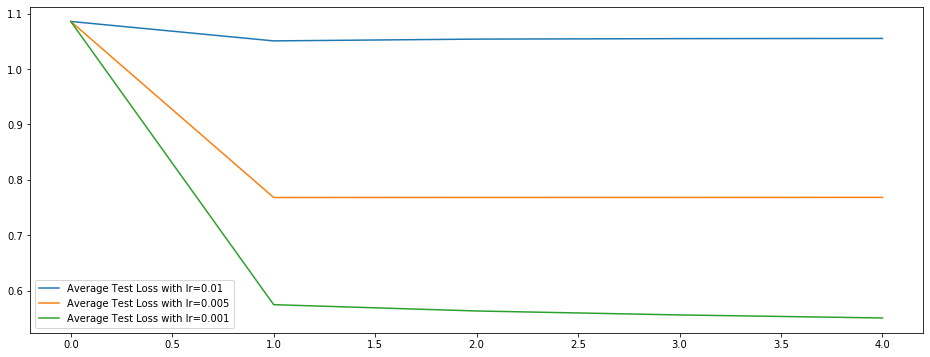

In [5]:
fig = plt.figure(figsize=(16, 6))

for i in range(len(lr_range)):
    plt.plot(range(epochs), avg_loss_test[i], label = "Average Test Loss with lr={}".format(lr_range[i]))

plt.legend()
plt.show()

In [6]:
avg_loss_test

[array([1.08564934, 1.05061466, 1.05382272, 1.0546903 , 1.05503896]),
 array([1.08564934, 0.76818704, 0.76829181, 0.76831712, 0.76837979]),
 array([1.08564934, 0.57490359, 0.5635441 , 0.55639329, 0.55092227])]